ENVECON 105 Final Individual Project

Casey Brown

1. Main Research Question(s)

1) How have CO2 emission rates changed over time? In particular for the US, and how does the US compare to other countries?

2) Are CO2 emissions in the US, global temperatures, and natural disaster rates in the US associated?

2. What is the data?

CO2 Emissions (global) in metric tons per person 1751-2022 from https://cdiac.ess-dive.lbl.gov/

GDP (global) in international dollars per person 1800-2100 from https://data.worldbank.org/indicator/NY.GDP.PCAP.KD.ZG

Energy Use (global) in kg oil equivalent per person 1990-2023 from https://data.worldbank.org/indicator/EG.USE.PCAP.KG.OE

Temperature (US only) in degrees F 1895-2025 from https://www.ncdc.noaa.gov/billions/time-series

Natural Disasters (US only) in cost in $ from https://www.ncdc.noaa.gov/cag/national/time-series

3. Data Import:

Import the raw data into five different dataframes.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from google.colab import drive
#drive.mount('/content/drive')

#co2_emissions = pd.read_csv('/content/drive/MyDrive/Env Econ 105 Final Group Project/co2_pcap_cons.csv')
co2_emissions = pd.read_csv('co2_pcap_cons.csv')
#gdp_growth = pd.read_csv('/content/drive/MyDrive/Env Econ 105 Final Group Project/gdp_total_yearly_growth.csv')
gdp_growth = pd.read_csv('gdp_total_yearly_growth.csv')
#energy_use = pd.read_csv('/content/drive/MyDrive/Env Econ 105 Final Group Project/energy_use_per_person.csv')
energy_use = pd.read_csv('energy_use_per_person.csv')
#natural_disasters = pd.read_csv('/content/drive/MyDrive/Env Econ 105 Final Group Project/US_natural_disasters_cost.csv', skiprows=3, header=0, delimiter=',')
natural_disasters = pd.read_csv('US_natural_disasters_cost.csv', skiprows=3, header=0, delimiter=',')

# Read the temperature CSV with a semicolon delimiter and split the column
# Corrected file path and reading with ';' delimiter
#temperature = pd.read_csv('/content/drive/MyDrive/Env Econ 105 Final Group Project/data (2).csv', delimiter=';')
temperature = pd.read_csv('data (2).csv', delimiter=';')

4. Data Wrangling

First, I'll wrangle the temperature data so that it has three columns: Year, Temperature, and Country.

In [6]:
#temperature

 # Split the column and drop the original, handling potential leading/trailing spaces
temperature[['Year', 'Temperature']] = temperature['#  Contiguous U.S. July Average Temperature'].str.strip().str.split(',', expand=True)
temperature = temperature.drop(columns=['#  Contiguous U.S. July Average Temperature'])
# Remove "# Units: Degrees Fahrenheit" and "Date,Value" rows
temperature = temperature[~temperature['Year'].str.contains('# Units:|Year,Temperature', na=False)].copy()
# Remove the last two characters ('07') from the 'Date' column
temperature['Year'] = temperature['Year'].str[:-2]
# Drop the first row (index 1 after filtering)
temperature = temperature.drop(index=temperature.index[0])
# Convert 'Value' to numeric
temperature['Temperature'] = pd.to_numeric(temperature['Temperature'])
temperature['Country'] = 'USA'
temperature

Year  Temperature Country
2    1895        71.22     USA
3    1896        73.65     USA
4    1897        73.33     USA
5    1898        73.26     USA
6    1899        73.04     USA
..    ...          ...     ...
128  2021        75.40     USA
129  2022        76.39     USA
130  2023        75.65     USA
131  2024        75.69     USA
132  2025        75.40     USA

[131 rows x 3 columns]

Next, I'll wrangle the Natural Disasters dataframe so it has three columns: Country, Year, and All Disasters Cost, which is the sum cost of all the natural disasters in each specific year.

In [7]:
#natural_disasters

natural_disasters = natural_disasters.rename(columns={'State': 'Country'}) # Rename 'State' column to 'Country'
natural_disasters = natural_disasters[['Country', 'Year', 'All Disasters Cost']] # Select the desired columns using a list
natural_disasters

Country  Year  All Disasters Cost
0       US  1980                45.7
1       US  1981                 3.5
2       US  1982                 5.4
3       US  1983                36.6
4       US  1984                 3.3
5       US  1985                22.6
6       US  1986                 7.8
7       US  1987                 0.0
8       US  1988                54.6
9       US  1989                40.3
10      US  1990                14.6
11      US  1991                19.6
12      US  1992                80.1
13      US  1993                65.7
14      US  1994                16.4
15      US  1995                35.6
16      US  1996                23.3
17      US  1997                15.2
18      US  1998                40.3
19      US  1999                24.5
20      US  2000                15.5
21      US  2001                21.8
22      US  2002                27.2
23      US  2003                38.4
24      US  2004                92.3
25      US  2005               268.5
26      US  2006                25.2
27      US  2007                18.8
28      US  2008                94.1
29      US  2009                19.8
30      US  2010                20.2
31      US  2011                98.1
32      US  2012               158.9
33      US  2013                32.3
34      US  2014                25.4
35      US  2015                31.0
36      US  2016                61.3
37      US  2017               395.9
38      US  2018               116.1
39      US  2019                55.5
40      US  2020               120.6
41      US  2021               164.5
42      US  2022               183.6
43      US  2023                95.3
44      US  2024               182.7

Next, I'll wrangle CO2 emissions into a long format. It now has only three columns: Country, Year, and Emissions (Metric Tons Per Person) and is used for ease of graphing.

In [8]:
#co2_emissions

#convert to long format for graphing

# Melt the DataFrame to long format
co2_emissions_long = co2_emissions.melt(id_vars=['country'], var_name='Year', value_name='Value')

# Convert 'Year' column to numeric
co2_emissions_long['Year'] = pd.to_numeric(co2_emissions_long['Year'])

# Convert 'Value' column to numeric, coercing errors
co2_emissions_long['Value'] = pd.to_numeric(co2_emissions_long['Value'], errors='coerce')

#Rename columns
co2_emissions_long = co2_emissions_long.rename(columns={'Value': 'Emissions (Metric Tons Per Person)'}) # Rename 'Value' column to 'Emissions'
co2_emissions_long = co2_emissions_long.rename(columns={'country': 'Country'}) # Rename 'country' column to 'Country'

co2_emissions_long

Country  Year  Emissions (Metric Tons Per Person)
0       Afghanistan  1800                               0.001
1            Angola  1800                               0.009
2           Albania  1800                               0.001
3           Andorra  1800                               0.333
4               UAE  1800                               0.063
...             ...   ...                                 ...
43257         Samoa  2022                               1.430
43258         Yemen  2022                               0.395
43259  South Africa  2022                               5.180
43260        Zambia  2022                               0.424
43261      Zimbabwe  2022                               0.804

[43262 rows x 3 columns]

Then I'll wrangle GDP growth into long format so that its columns are Country, Year, and Percent Yearly Growth. This makes it easier to graph.

In [9]:
#gdp_growth

#convert to long format for graphing

# Melt the DataFrame to long format
gdp_growth_long = gdp_growth.melt(id_vars=['country'], var_name='Year', value_name='Value')

# Convert 'Year' column to numeric
gdp_growth_long['Year'] = pd.to_numeric(gdp_growth_long['Year'])

# Convert 'Value' column to string to handle potential non-numeric characters
gdp_growth_long['Value'] = gdp_growth_long['Value'].astype(str)

# Replace the non-standard minus sign with a standard one
gdp_growth_long['Value'] = gdp_growth_long['Value'].str.replace('−', '-', regex=False)

# Replace 'k' with 'e3' for scientific notation
gdp_growth_long['Value'] = gdp_growth_long['Value'].str.replace('k', 'e3', regex=False)

# Convert 'Value' to numeric, coercing any remaining errors
gdp_growth_long['Value'] = pd.to_numeric(gdp_growth_long['Value'], errors='coerce')


#Rename columns
gdp_growth_long = gdp_growth_long.rename(columns={'Value': 'Percent Yearly Growth'}) # Rename 'Value' column to 'International Dollars'
gdp_growth_long = gdp_growth_long.rename(columns={'country': 'Country'}) # Rename 'country' column to 'Country'

display(gdp_growth_long.head(100))

Country  Year  Percent Yearly Growth
0         Aruba  1801                 0.0000
1   Afghanistan  1801                 0.0000
2        Angola  1801                 0.4250
3      Anguilla  1801                 0.0000
4       Albania  1801                 0.4180
..          ...   ...                    ...
95       Israel  1801                 0.0236
96        Italy  1801                -0.9550
97      Jamaica  1801                 0.0000
98       Jordan  1801                 0.0000
99        Japan  1801                    NaN

[100 rows x 3 columns]

Finally, I'll wrangle Energy Use into a similar long format with columns of Country, Year, and Kg Oil Eq Per Capita. This again makes it easier to graph later.

In [10]:
#energy_use

# Melt the DataFrame to long format
energy_use_long = energy_use.melt(id_vars=['country'], var_name='Year', value_name='Value')

# Convert 'Year' column to numeric
energy_use_long['Year'] = pd.to_numeric(energy_use_long['Year'])

# Convert 'Value' column to string to handle 'k'
energy_use_long['Value'] = energy_use_long['Value'].astype(str)

# Replace 'k' with 'e3' and then convert to numeric, coercing errors
energy_use_long['Value'] = energy_use_long['Value'].str.replace('k', 'e3', regex=False)
energy_use_long['Value'] = pd.to_numeric(energy_use_long['Value'], errors='coerce')


#Rename columns
energy_use_long = energy_use_long.rename(columns={'Value': 'Kg Oil Eq Per Capita'}) # Rename 'Value' column to 'Kg Oil Eq Per Capita'
energy_use_long = energy_use_long.rename(columns={'country': 'Country'}) # Rename 'country' column to 'Country'

energy_use_long

Country  Year  Kg Oil Eq Per Capita
0           Angola  1990                 506.0
1          Albania  1990                 813.0
2              UAE  1990               10700.0
3        Argentina  1990                1350.0
4          Armenia  1990                2170.0
...            ...   ...                   ...
6081         Samoa  2023                   NaN
6082         Yemen  2023                   NaN
6083  South Africa  2023                   NaN
6084        Zambia  2023                   NaN
6085      Zimbabwe  2023                   NaN

[6086 rows x 3 columns]

In order to make faceted graphs later, I'm going to combine all the data into one dataframe. I could use this combined datframe for all the graphs, but to keep things simple I'll often use individual smaller dataframes to access the data.

In [11]:
# Combine the dataframes

# Merge the dataframes on 'Country' and 'Year'
combined_df = co2_emissions_long.merge(gdp_growth_long, on=['Country', 'Year'], how='outer')
combined_df = combined_df.merge(energy_use_long, on=['Country', 'Year'], how='outer')

#Convert 'Year' column in combined_df to numeric
combined_df['Year'] = pd.to_numeric(combined_df['Year'], errors='coerce').astype('Int64')
temperature['Year'] = pd.to_numeric(temperature['Year'], errors='coerce').astype('Int64')
natural_disasters['Year'] = pd.to_numeric(natural_disasters['Year'], errors='coerce').astype('Int64')

# Merge temperature and natural disasters with combined_df for US data
combined_df = combined_df.merge(temperature[['Year', 'Temperature', 'Country']], on=['Country', 'Year'], how='left')
combined_df = combined_df.merge(natural_disasters[['Year', 'All Disasters Cost']], on='Year', how='left')

# Add 'Region' column to combined_df
combined_df['Region'] = combined_df['Country'].apply(lambda x: 'United States' if x == 'USA' else 'Rest of World')

# Select and rename the desired columns
combined_data = combined_df[[
    'Country',
    'Year',
    'Emissions (Metric Tons Per Person)',
    'Percent Yearly Growth',
    'Kg Oil Eq Per Capita',
    'Temperature',
    'All Disasters Cost',
    'Region'
]].rename(columns={
    'Emissions (Metric Tons Per Person)': 'CO2 emissions per capita',
    'International Dollars': 'GDP per capita',
    'Kg Oil Eq Per Capita': 'Energy use per capita'
})

display(combined_df[(combined_df['Country']== 'USA')& (combined_df['Temperature'].notna())].head())
display(combined_data[(combined_data['Country']== 'USA')& (combined_data['Temperature'].notna())].tail())

Country  Year  Emissions (Metric Tons Per Person)  \
46685     USA  1895                                6.72   
46686     USA  1896                                6.61   
46687     USA  1897                                6.74   
46688     USA  1898                                7.21   
46689     USA  1899                                8.11   

       Percent Yearly Growth  Kg Oil Eq Per Capita  Temperature  \
46685                  12.10                   NaN        71.22   
46686                  -2.04                   NaN        73.65   
46687                   9.54                   NaN        73.33   
46688                   2.10                   NaN        73.26   
46689                   9.07                   NaN        73.04   

       All Disasters Cost         Region  
46685                 NaN  United States  
46686                 NaN  United States  
46687                 NaN  United States  
46688                 NaN  United States  
46689                 NaN  United States

Country  Year  CO2 emissions per capita  Percent Yearly Growth  \
46809     USA  2019                      16.9                    NaN   
46810     USA  2020                      15.4                    NaN   
46811     USA  2021                      16.1                    NaN   
46812     USA  2022                      16.4                    NaN   
46813     USA  2023                       NaN                    NaN   

       Energy use per capita  Temperature  All Disasters Cost         Region  
46809                 6740.0        74.59                55.5  United States  
46810                 6140.0        75.63               120.6  United States  
46811                 6440.0        75.40               164.5  United States  
46812                 6520.0        76.39               183.6  United States  
46813                 6430.0        75.65                95.3  United States

5. Data Visualization

1) Recreation of the first line plot under the "adding color" subsection.

In [12]:
import plotly.express as px

# Reorder the DataFrame to plot US last by sorting by Country
co2_emissions_long['Country'] = pd.Categorical(co2_emissions_long['Country'], categories=[country for country in co2_emissions_long['Country'].unique() if country != 'USA'] + ['USA'], ordered=True)
co2_emissions_long = co2_emissions_long.sort_values('Country')


# Create a dictionary for color mapping, setting all countries except US to dark gray
color_map = {country: '#3A3B3C' for country in co2_emissions_long['Country'].unique() if country != 'USA'}
color_map['USA'] = '#0496C7'

co2_emissions_long = co2_emissions_long.sort_values('Year')

# Create a line plot of the data with updated color mapping
world_emissions = px.line(co2_emissions_long, x='Year', y='Emissions (Metric Tons Per Person)', color='Country', color_discrete_map=color_map)

# Update the y-axis range to a smaller scale to better visualize US's data
#fig.update_layout(yaxis_range=[-0.1, 63])

# Make gray lines thinner
for trace in world_emissions.data:
    if trace.line.color == '#3A3B3C':
        trace.line.width = 0.3  # Adjust the width as needed

# Update layout for titles and labels
world_emissions.update_layout(
    title="United States CO2 Emissions Per Year (1751-2022)",
    yaxis_title="Emissions (Metric Tonnes) Per Person",
    legend_title_text ="Country",
    plot_bgcolor='white', # Set background color to white
    height=600, width=900 # Updated figure height and width
)

# Add grid lines
world_emissions.update_xaxes(showgrid=True, gridcolor='lightgray')
world_emissions.update_yaxes(showgrid=True, gridcolor='lightgray')


for trace in world_emissions.data:
  if trace.name != 'USA':
    trace.showlegend = False

display(world_emissions)
# Update figure height
#fig.update_layout(height=600) # You can adjust the height value as needed


# Display the chart
# fig.show()

2) Recreation of the top 10 emitting country line plot with names attached to the lines at the end of the "adding color" subsection.

First, I'll create a dataframe with the top ten emitting countries in 2022.

In [13]:
# top ten dataframe

# Filter for the latest year (2022) using boolean indexing
co2_emissions_latest_year = co2_emissions_long[co2_emissions_long['Year'] == 2022]

# Sort by 'Value' to get the top 10 countries by their 2022 emissions
top_10_countries_2022 = co2_emissions_latest_year.sort_values(by='Emissions (Metric Tons Per Person)', ascending=False).head(10)

# Get the list of country names that are in the top 10 in 2022
top_10_country_names = top_10_countries_2022['Country'].tolist()

# Filter the original df_long DataFrame to include only the top 10 countries for all years
co2_emissions_top_10_all_years = co2_emissions_long[co2_emissions_long['Country'].isin(top_10_country_names)]

Then, I'll create the line plot of only those top ten emitting countries from 2022 with their historic emissions data over time.

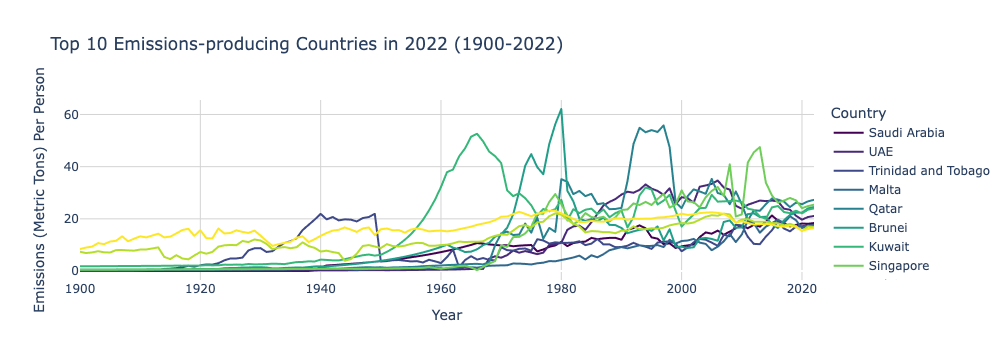

In [14]:
#line plot
import plotly.express as px

# Filter for the top 10 countries and years from 1900 onwards
co2_emissions_top_10_filtered = co2_emissions_long[co2_emissions_long['Country'].isin(top_10_country_names)].copy()
co2_emissions_top_10_filtered = co2_emissions_top_10_filtered[co2_emissions_top_10_filtered['Year'] >= 1900].copy()

# Sort by year for plotting
co2_emissions_top_10_filtered = co2_emissions_top_10_filtered.sort_values('Year')

# Create a line plot
colored_fig = px.line(co2_emissions_top_10_filtered,
              x='Year',
              y='Emissions (Metric Tons Per Person)',
              color='Country',
              color_discrete_sequence=px.colors.sequential.Viridis, # Use viridis color palette
              title='Top 10 Emissions-producing Countries in 2022 (1900-2022)', # Updated title to reflect 2022
              labels={'Emissions (Metric Tons Per Person)': 'Emissions (Metric Tons)'}) # Updated y-axis label

# Update layout for better readability
colored_fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Emissions (Metric Tons) Per Person",
    legend_title_text="Country",
    width=800, # Set the width of the plot
    plot_bgcolor='white' # Set background color to white
)

# Add grid lines
colored_fig.update_xaxes(showgrid=True, gridcolor='lightgray')
colored_fig.update_yaxes(showgrid=True, gridcolor='lightgray')

# Display the chart
colored_fig.show()

3) Recreation of the tile plot of the top 10 countries.

/tmp/ipykernel_276/2271957709.py:17: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



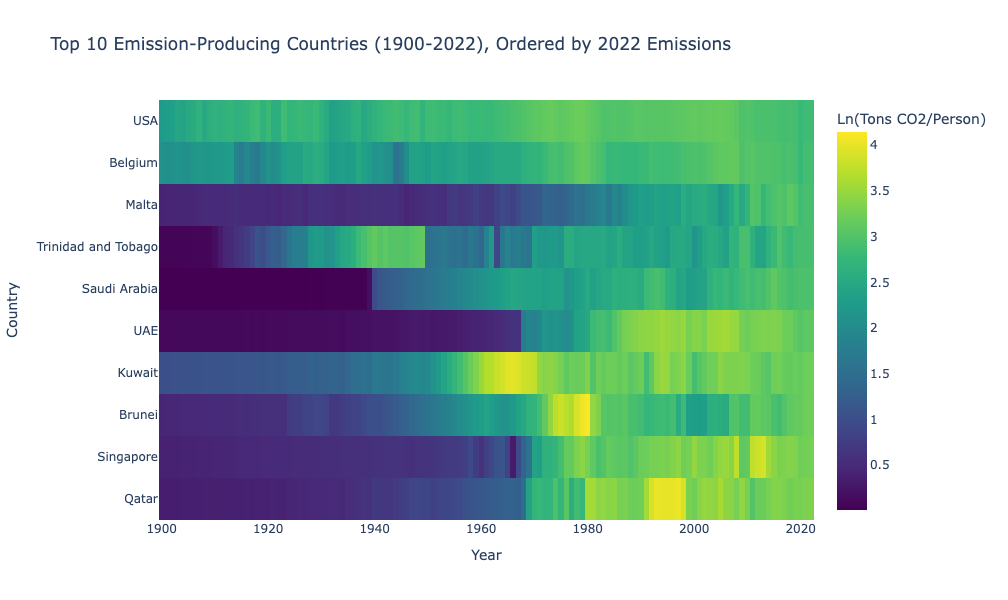

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

# Filter the DataFrame to include only years from 1900 onwards as in the R code
co2_emissions_top_10_filtered = co2_emissions_top_10_all_years[co2_emissions_top_10_all_years['Year'] >= 1900].copy()

# Reorder countries based on the last emission value (in 2022, as 2014 is not the latest)
latest_year_emissions = co2_emissions_top_10_filtered[co2_emissions_top_10_filtered['Year'] == 2022].sort_values(by='Emissions (Metric Tons Per Person)', ascending=False)
country_order = latest_year_emissions['Country'].tolist()

# Convert 'country' to a categorical type with the desired order
co2_emissions_top_10_filtered['Country'] = pd.Categorical(co2_emissions_top_10_filtered['Country'], categories=country_order, ordered=True)

# Pivot the data to create a matrix suitable for a heatmap
heatmap_data = co2_emissions_top_10_filtered.pivot_table(index='Country', columns='Year', values='Emissions (Metric Tons Per Person)')

# Apply log transformation as in the R code, handling potential zero or negative values
heatmap_data = heatmap_data.apply(lambda x: np.log(x + 1)) # Add 1 to handle log(0)


# Create a Plotly heatmap
top_ten_tile = go.Figure(data=go.Heatmap(
                   z=heatmap_data.values,
                   x=heatmap_data.columns,
                   y=heatmap_data.index,
                   colorscale='viridis',
                   colorbar=dict(title='Ln(Tons CO2/Person)')))

# Update layout for titles and labels
top_ten_tile.update_layout(
    title='Top 10 Emission-Producing Countries (1900-2022), Ordered by 2022 Emissions',
    xaxis_title='Year',
    yaxis_title='Country',
    width=900, # Set the width
    height=600 # Set the height
)

4) Recreaction of the last facet figure, 3x2 figure.

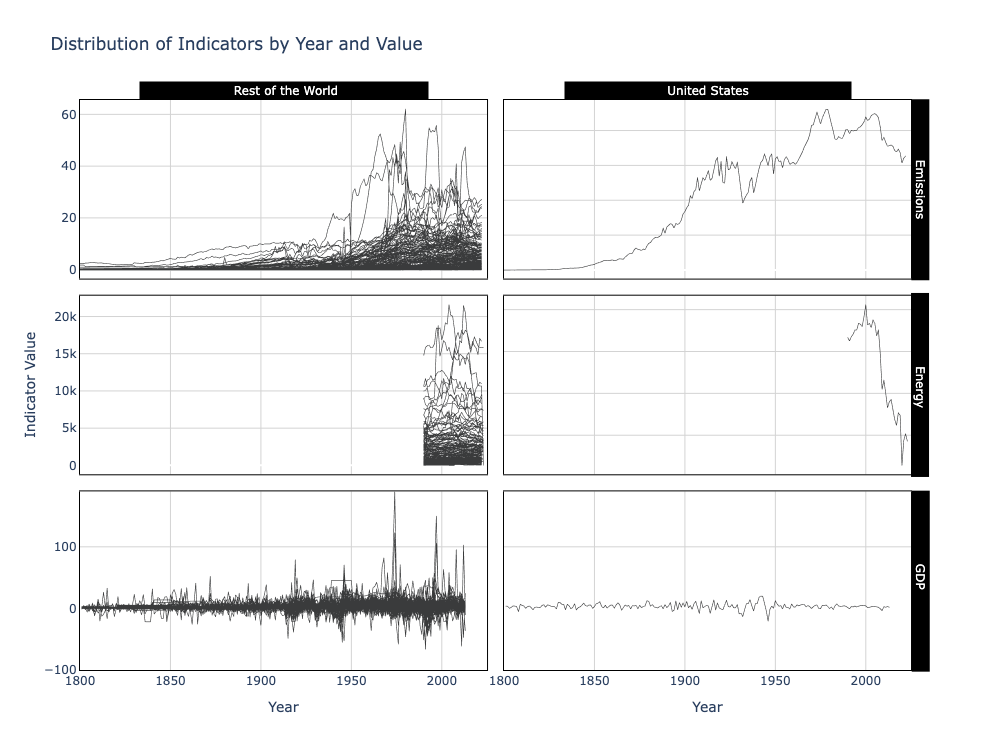

In [16]:
import plotly.express as px
import pandas as pd

# Melt the combined_data DataFrame to long format for plotting
data_long = combined_data.melt(
    id_vars=['Country', 'Year', 'Region'], # Columns to keep as identifiers
    value_vars=['CO2 emissions per capita', 'Energy use per capita', 'Percent Yearly Growth'], # Columns to melt - Corrected 'GDP per capita' to 'Percent Yearly Growth'
    var_name='Indicator', # Name of the new column for indicator names
    value_name='Value' # Name of the new column for indicator values
)

# Ensure 'Region' column is categorical with the desired order
data_long['Region'] = pd.Categorical(data_long['Region'], categories=['Rest of World', 'United States'], ordered=True)
data_long = data_long.sort_values('Region')

indicator_order = ['CO2 emissions per capita', 'Energy use per capita', 'Percent Yearly Growth'] # Corrected 'GDP per capita' to 'Percent Yearly Growth'
data_long['Indicator'] = pd.Categorical(data_long['Indicator'], categories=indicator_order, ordered=True)

# Filter out rows with NaN values in the 'Value' column for cleaner plotting
data_long = data_long.dropna(subset=['Value'])

#Sort data by year
data_long = data_long.sort_values(['Indicator','Year'])

# Create the facet grid plot using Plotly Express
facet_fig = px.line(data_long, # Use the data_long DataFrame
              x='Year',
              y='Value',
              color='Country', # You might want to color by Country or another variable
              facet_row='Indicator', # Facet by Indicator
              facet_col='Region', # Facet by Region
              title='Distribution of Indicators by Year and Value',
              color_discrete_sequence=['black'])

# Update layout for better readability and appearance
facet_fig.update_layout(
      #yaxis_title="Indicator Value",
      showlegend = False,
      plot_bgcolor = 'white', # Set background color to white
      width=750,
      height = 750 # Shrink the width to 2/3 of 900
    # You can add other layout updates here if needed
)

# Adjust facet titles and spacing if necessary
for annotation in facet_fig.layout.annotations:
  if annotation.text == 'Region=Rest of World':
    annotation.text = '                      Rest of the World                     '
    annotation.font = dict(color = 'white')
    annotation.bgcolor = 'black'
  elif annotation.text == 'Region=United States':
    annotation.text = '                        United States                        '
    annotation.font = dict(color = 'white')
    annotation.bgcolor = 'black'
  elif annotation.text == 'Indicator=CO2 emissions per capita':
    annotation.text = '              Emissions              '
    annotation.font = dict(color = 'white')
    annotation.bgcolor = 'black'
  elif annotation.text == 'Indicator=Percent Yearly Growth':
    annotation.text = '                 GDP                   '
    annotation.font = dict(color = 'white')
    annotation.bgcolor = 'black'
  elif annotation.text == 'Indicator=Energy use per capita':
    annotation.text = '                 Energy                '
    annotation.font = dict(color = 'white')
    annotation.bgcolor = 'black'

# Add options to label right hand side y-axes and top x-axes
facet_fig.update_yaxes(matches=None, showline=True, linewidth=1, linecolor='black', mirror=True, showgrid=True, gridcolor='lightgray') # Allow independent y-axes and set grid properties
facet_fig.update_xaxes(matches=None, range=[1800, 2025], showline=True, linewidth=1, linecolor='black', mirror=True, showgrid=True, gridcolor='lightgray') # Allow independent x-axes and set grid properties

#set line width for traces
facet_fig.update_traces(line=dict(width=0.6, color = '#3A3B3C'))

facet_fig.layout.yaxis1.update(range=[-100,190],autorange = False, title="")
facet_fig.layout.yaxis2.update(range=[-100,190],autorange = False)
facet_fig.layout.yaxis3.update(title = "Indicator Value")
facet_fig.layout.yaxis5.update(title = "")

# Display the chart
facet_fig.show()

5) Recreation of the two scatter plots in the “Scatter Plot” subsection, including the trend lines on the figures.

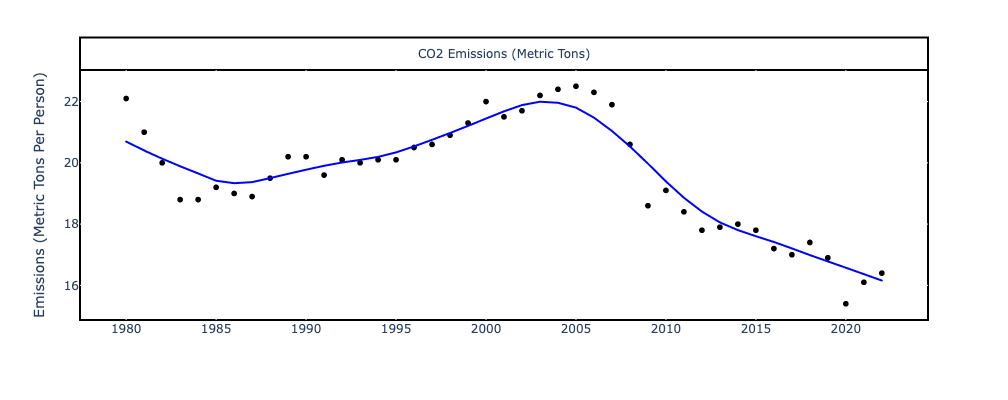

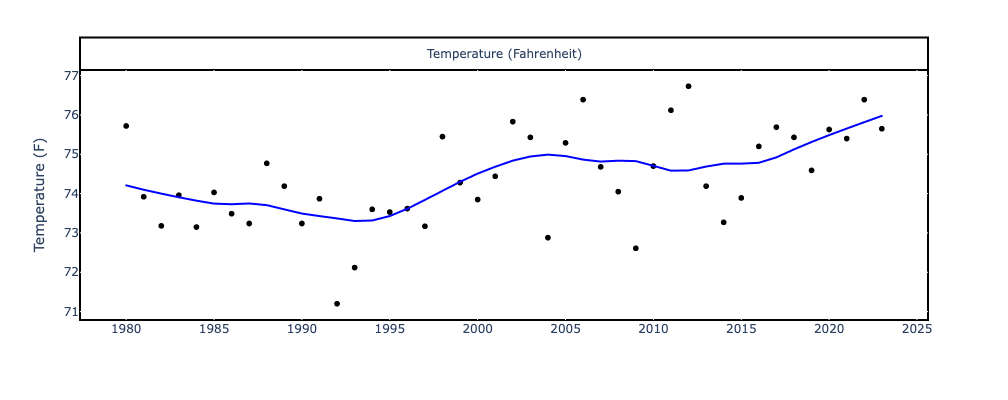

In [17]:
import plotly.graph_objects as go
import statsmodels.api as sm # For LOESS smoothing
import pandas as pd
from IPython.display import display # Import display

# Melt the combined_data DataFrame to long format for plotting
data_long_plus_temp = combined_data.melt(
    id_vars=['Country', 'Year'], # Columns to keep as identifiers
    value_vars=['CO2 emissions per capita', 'Temperature'], # Columns to melt
    var_name='Indicator', # Name of the new column for indicator names
    value_name='Value' # Name of the new column for indicator values
)


# Filter data for Emissions and years 1980-2025
emissions_data = data_long[(data_long['Indicator'] == 'CO2 emissions per capita') & (data_long['Country'] == 'USA')].copy() # Corrected filtering syntax
emissions_data = emissions_data[(emissions_data['Year'] >= 1980) & (emissions_data['Year'] <= 2025)].sort_values('Year') # Filter by year, sort

# Filter data for Temperature, drop NaN values and filter for years 1980-2025
temperature_data = data_long_plus_temp[(data_long_plus_temp['Indicator'] == 'Temperature') & (data_long_plus_temp['Country'] == 'USA')].dropna(subset=['Value']).copy() # Corrected filtering syntax and added country filter
temperature_data = temperature_data[(temperature_data['Year'] >= 1980) & (temperature_data['Year'] <= 2025)].sort_values('Year') # Filter by year, sort


# Create a single figure with Emissions data
fig_emissions = go.Figure()
fig_emissions.add_trace(go.Scattergl(x=emissions_data['Year'], y=emissions_data['Value'], mode='markers', name='Emissions Data', marker=dict(color='black'))) # Changed marker color to black

# Calculate and add LOESS for Emissions
if not emissions_data.empty:
    lowess_emissions = sm.nonparametric.lowess(emissions_data['Value'], emissions_data['Year'], frac=0.3)
    fig_emissions.add_trace(go.Scattergl(x=lowess_emissions[:, 0], y=lowess_emissions[:, 1], mode='lines', name='Emissions LOESS', line=dict(color='blue'))) # Changed line color to blue

# Update layout for Emissions figure
fig_emissions.update_layout(height=400, title_text='', showlegend=False, plot_bgcolor='white') # Changed showlegend to False, removed width, set title_text to empty
fig_emissions.update_xaxes(tickmode='array', tickvals=list(range(1980, 2030, 5)))
fig_emissions.update_yaxes(title_text='Emissions (Metric Tons Per Person)')

# Add a rectangular border around the title and chart, and position the title as an annotation
fig_emissions.update_layout(
    shapes=[
        dict(
            type="rect",
            xref="paper", yref="paper",
            x0=0, y0=1, x1=1, y1=1.13, # Adjusted y0 to align with chart top
            line=dict(color="black", width=2), # Border width 1
            fillcolor="rgba(0,0,0,0)", # Transparent fill
            layer="below" # Draw the rectangle below the title text
        ),
        dict( # Add border around the entire chart
            type="rect",
            xref="paper", yref="paper",
            x0=0, y0=0, x1=1, y1=1, # Coordinates for the entire plot area (0 to 1 in paper coordinates)
            line=dict(color="black", width=2), # Border width 1
            fillcolor="rgba(0,0,0,0)", # Transparent fill
            layer="below" # Draw the rectangle below the plot content
        )
    ],
    annotations=[
        dict(
            text='CO2 Emissions (Metric Tons)', # Title text
            xref="paper", yref="paper",
            x=0.5, # Center horizontally
            y=1.065, # Position vertically within the rectangle (midpoint of 1 and 1.13)
            showarrow=False,
            xanchor="center",
            yanchor="middle"
        )
    ],
    margin=dict(t=70) # Add top margin to make space for the rectangle
)

# Display the emissions figure
display(fig_emissions)


# Create a single figure with Temperature data
fig_temperature = go.Figure()
fig_temperature.add_trace(go.Scattergl(x=temperature_data['Year'], y=temperature_data['Value'], mode='markers', name='Temperature Data', marker=dict(color='black'))) # Changed marker color to black

# Calculate and add LOESS for Temperature
if not temperature_data.empty:
    lowess_temperature = sm.nonparametric.lowess(temperature_data['Value'], temperature_data['Year'], frac=0.3)
    fig_temperature.add_trace(go.Scattergl(x=lowess_temperature[:, 0], y=lowess_temperature[:, 1], mode='lines', name='Temperature LOESS', line=dict(color='blue'))) # Changed line color to blue

# Update layout for Temperature figure
fig_temperature.update_layout(height=400, title_text='', showlegend=False, plot_bgcolor='white') # Changed showlegend to False, removed width, set title_text to empty
fig_temperature.update_xaxes(tickmode='array', tickvals=list(range(1980, 2030, 5)))
fig_temperature.update_yaxes(title_text='Temperature (F)')

# Add a rectangular border around the title and chart, and position the title as an annotation
fig_temperature.update_layout(
    shapes=[
        dict(
            type="rect",
            xref="paper", yref="paper",
            x0=0, y0=1, x1=1, y1=1.13, # Adjusted y0 to align with chart top
            line=dict(color="black", width=2), # Border width 1
            fillcolor="rgba(0,0,0,0)", # Transparent fill
            layer="below" # Draw the rectangle below the title text
        ),
         dict( # Add border around the entire chart
            type="rect",
            xref="paper", yref="paper",
            x0=0, y0=0, x1=1, y1=1, # Coordinates for the entire plot area (0 to 1 in paper coordinates)
            line=dict(color="black", width=2), # Border width 1
            fillcolor="rgba(0,0,0,0)", # Transparent fill
            layer="below" # Draw the rectangle below the plot content
        )
    ],
     annotations=[
        dict(
            text='Temperature (Fahrenheit)', # Title text
            xref="paper", yref="paper",
            x=0.5, # Center horizontally
            y=1.065, # Position vertically within the rectangle (midpoint of 1 and 1.13)
            showarrow=False,
            xanchor="center",
            yanchor="middle"
        )
    ],
    margin=dict(t=70) # Add top margin to make space for the rectangle
)

# Display the temperature figure
display(fig_temperature)

6. Data Analysis

1) Calculation of the Mean and SD for emissions and temperature in the US:

In [18]:
# Calculate mean and standard deviation for US CO2 emissions
us_emissions_data = co2_emissions_long[co2_emissions_long['Country'] == 'USA'].copy()
us_emissions_mean = us_emissions_data['Emissions (Metric Tons Per Person)'].mean()
display(f"Mean US CO2 Emissions (Metric Tons Per Person): {us_emissions_mean}")

us_emissions_sd = us_emissions_data['Emissions (Metric Tons Per Person)'].std()
display(f"Standard Deviation US CO2 Emissions (Metric Tons Per Person): {us_emissions_sd}")

# Calculate mean and standard deviation for Temperature
temperature_mean = temperature['Temperature'].mean()
display(f"Mean US Temperature (F): {temperature_mean}")

temperature_sd = temperature['Temperature'].std()
display(f"Standard Deviation US Temperature (F): {temperature_sd}")

'Mean US CO2 Emissions (Metric Tons Per Person): 10.032695067264575'

'Standard Deviation US CO2 Emissions (Metric Tons Per Person): 8.022499567029815'

'Mean US Temperature (F): 73.83137404580151'

'Standard Deviation US Temperature (F): 1.2515939150716084'

2) Calculation of the correlation coefficient for emissions and temperature:

First, I cut the dataframes to years when both have data available: 1895-2022.

Then, I combined them into one dataframe based on 'Year' and calculate the correlation coefficient.

In [19]:
temperature_data_shrunk = temperature[temperature['Year'].isin(range(1895, 2022))]

emissions_data_shrunk = us_emissions_data[us_emissions_data['Year'].isin(range(1895, 2022))]

# Merge the two dataframes on the 'Year' column
merged_data = temperature_data_shrunk.merge(emissions_data_shrunk, on='Year', how='inner')


temperature_correlation = merged_data['Temperature'].corr(merged_data['Emissions (Metric Tons Per Person)'])
display(f"Correlation between US Temperature and CO2 Emissions: {temperature_correlation}")

'Correlation between US Temperature and CO2 Emissions: 0.13707987792639215'

A correlation coefficient of 0.137 indicates a low positive correlation. This means that temperature increases a little as CO2 Emissions increase. This makes sense since as atmospheric CO2 levels rise, they produce a greenhouse effect, warming the planet.

3) Recreation of the scaled scatter plot at the end "Relationship between correlation and linear regression" subsection.

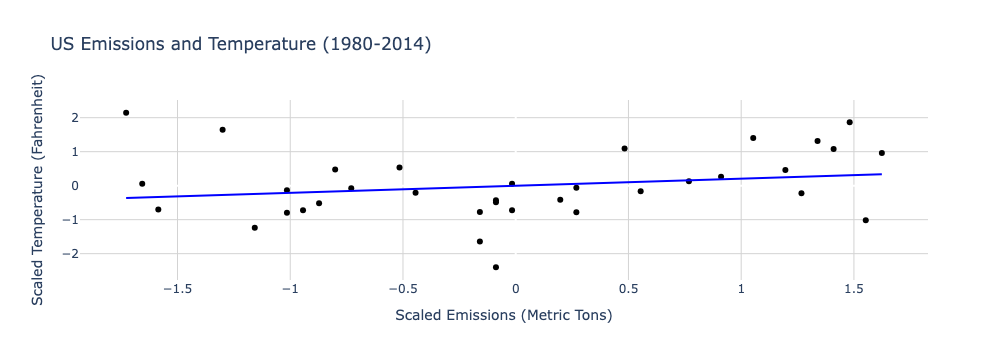

In [20]:
import plotly.express as px
import statsmodels.api as sm # For LOESS smoothing
import pandas as pd
import numpy as np

# Assuming merged_data dataframe exists from previous steps and contains 'Year', 'Temperature', and 'Emissions (Metric Tons Per Person)'
# If not, you would need to create it by merging temperature_data_shrunk and emissions_data_shrunk

# Filter data for the years 1980-2014 as specified in the R code title
filtered_data = merged_data[(merged_data['Year'] >= 1980) & (merged_data['Year'] <= 2014)].copy()

# Scale the data
filtered_data['Scaled_Emissions'] = (filtered_data['Emissions (Metric Tons Per Person)'] - filtered_data['Emissions (Metric Tons Per Person)'].mean()) / filtered_data['Emissions (Metric Tons Per Person)'].std()
filtered_data['Scaled_Temperature'] = (filtered_data['Temperature'] - filtered_data['Temperature'].mean()) / filtered_data['Temperature'].std()


# Create a scatter plot using Plotly Express
fig_scaled_scatter = px.scatter(filtered_data,
                 x='Scaled_Emissions',
                 y='Scaled_Temperature',
                 title='US Emissions and Temperature (1980-2014)',
                 labels={'Scaled_Emissions': 'Scaled Emissions (Metric Tons)',
                         'Scaled_Temperature': 'Scaled Temperature (Fahrenheit)'},
                 trendline='ols',
                 color_discrete_sequence=['black']) # Set the color of the data points to black

# Update the color of the trendline to blue
fig_scaled_scatter.update_traces(selector=dict(mode='lines'), line=dict(color='blue'))


# Update layout for better appearance and shrink the x-axis
fig_scaled_scatter.update_layout(
    xaxis_title="Scaled Emissions (Metric Tons)",
    yaxis_title="Scaled Temperature (Fahrenheit)",
    showlegend=False, # Hide legend for clarity
    width=800, # Adjust the width of the plot
    plot_bgcolor='white' # Set background color to white
)

# Add grid lines
fig_scaled_scatter.update_xaxes(showgrid=True, gridcolor='lightgray')
fig_scaled_scatter.update_yaxes(showgrid=True, gridcolor='lightgray')

# Display the plot
# fig.show()

7. Summary Including the Summary Plot

Plot Section of Summary:

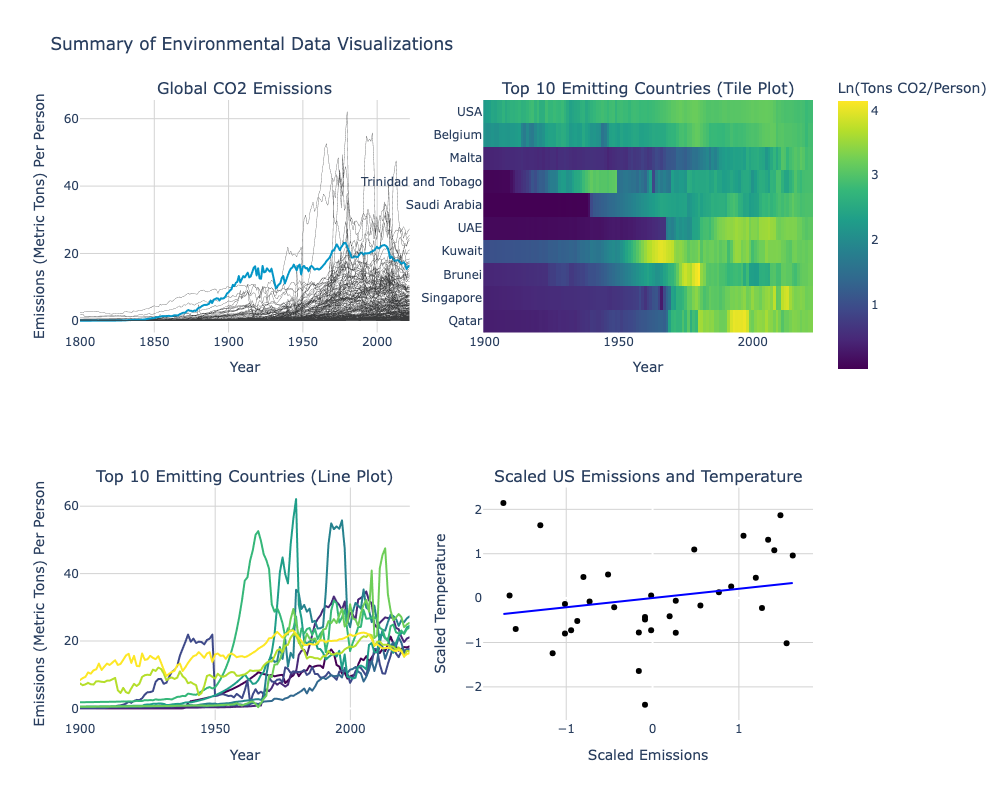

In [21]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px # Import plotly.express for facet_fig traces

# Create a 2x2 subplot layout
summary_fig = make_subplots(rows=2, cols=2,
                           subplot_titles=('Global CO2 Emissions', 'Top 10 Emitting Countries (Tile Plot)',
                                           'Top 10 Emitting Countries (Line Plot)', 'Scaled US Emissions and Temperature')) # Updated subplot titles

# Add the first plot (world_emissions) to the top-left
for trace in world_emissions.data:
    summary_fig.add_trace(trace, row=1, col=1)

# Add the second plot (top_ten_tile) to the top-right
for trace in top_ten_tile.data:
    # Modify the colorbar properties here for the specific trace
    trace.colorbar = dict(title='Ln(Tons CO2/Person)', len=0.5, y=0.8) # Adjusted y to control vertical position
    summary_fig.add_trace(trace, row=1, col=2)

# Add the third plot (colored_fig content) to the bottom-left
for trace in colored_fig.data:
    summary_fig.add_trace(trace, row=2, col=1)

# Add the fourth plot (fig_scaled_scatter content) to the bottom-right
for trace in fig_scaled_scatter.data:
    summary_fig.add_trace(trace, row=2, col=2)


# Update layout for titles, background color, and adjust subplot spacing
summary_fig.update_layout(height=800, width=1350, title_text="Summary of Environmental Data Visualizations",
                          plot_bgcolor='white') # Set overall plot background to white

# Update x-axes titles and grid lines
summary_fig.update_xaxes(title_text="Year", showgrid=True, gridcolor='lightgray', row=1, col=1) # Plot 1 x-axis
summary_fig.update_xaxes(title_text="Year", showgrid=True, gridcolor='lightgray', row=1, col=2) # Plot 2 x-axis (assuming user wants grid here too)
summary_fig.update_xaxes(title_text="Year", showgrid=True, gridcolor='lightgray', row=2, col=1) # Plot 3 x-axis
summary_fig.update_xaxes(title_text="Scaled Emissions", showgrid=True, gridcolor='lightgray', row=2, col=2) # Plot 4 x-axis

# Update y-axes titles and grid lines
summary_fig.update_yaxes(title_text="Emissions (Metric Tons) Per Person", showgrid=True, gridcolor='lightgray', row=1, col=1) # Plot 1 y-axis
summary_fig.update_yaxes(title_text="", row=1, col=2) # Plot 2 y-axis (removed title) - Keep default grid or add explicitly if needed
summary_fig.update_yaxes(title_text="Emissions (Metric Tons) Per Person", showgrid=True, gridcolor='lightgray', row=2, col=1) # Plot 3 y-axis
summary_fig.update_yaxes(title_text="Scaled Temperature", showgrid=True, gridcolor='lightgray', row=2, col=2) # Plot 4 y-axis


# Adjust layout to prevent titles overlapping
summary_fig.update_layout(margin=dict(t=100))

# Hide individual plot legends if desired (optional)
summary_fig.update_layout(showlegend=False)

# Display the combined figure
summary_fig.show()

Synopsis Section of Summary:

I analyzed CO₂ emissions from as early as 1751 to 2014 and found that global emissions have increased dramatically over time, with certain countries contributing disproportionately.

I explored how CO₂ emissions relate to factors such as temperature, energy use, and natural disasters. Correlation coefficients allowed us to measure the strength of relationships between datasets, while regression helped us predict or describe how changes in one variable might influence another. However, we must keep in mind that correlation does not necessarily imply causation.

In the case of CO₂ and global temperature, however, scientific evidence shows that CO₂ traps heat and contributes to warming. Still, the relationship between U.S. CO₂ emissions and U.S. average temperatures is influenced by additional factors, including:

-CO₂ emissions from other countries

-Other greenhouse gases

-Long-lasting CO₂ already in the atmosphere

-Heat stored in oceans from past emissions, which delays surface warming

Mitigating future warming requires global action to reduce greenhouse gas emissions. Even with past and current emissions already committed to some warming, reductions can limit its severity. In addition, societies must prepare for the increased frequency and severity of natural disasters. Since evidence shows that impoverished communities are the most vulnerable, climate adaptation efforts should prioritize their protection.

Now let's return to my main research questions and answer them with the data I explored and visualized in the graphs.

1) How have CO2 emission rates changed over time? In particular for the US, and how does the US compare to other countries? CO2 emission rates in the US have decreased over time, as seen in the first line plot. They did increase over the last 200 years, but recently they have decreased. Other developing countries have increasing CO2 rates, likely because of an increasing standard of living. Most other countries, who have lower standards of libing (as seen in the GDP per capita data) also have lower emissions. This is because a higher standard of living uses more things that require emissions to produce.

2) Are CO2 emissions in the US, global temperatures, and natural disaster rates in the US associated? Yes. There's a correlation coefficient of 0.137 between US CO2 emissions and US temperatures. This means there is a low positive association between the two. Like I said earlier, this makes sense because as CO2 is added to the atmospheric it createes a grrenhouse effect, reflecting heat that otherwise would go out to space back into the atmospheric. It's almost like an insulating blanket for the earth. So it makes sense that an increase in CO2 emissions would be associated with an increase in temperature. However, on a global scale it's difficult to tell because an increase in US emissions could be coupled with a decrease in global emissiins and then global temperatures cold decrease. So it's important to consider that other factors besides stricly CO2 emissions can increase the temperature. For example, methane is naother greenhouse gas not accounted for in the data that has 20x the global warming potential of CO2. Natural disaster rates tend to increase as the planet warms. They have a positive association with global temperature. For example, warmer waters in the Gulf of Mexico create stronger tropical storms. And warmer climate increases the risk of droughts that can result in more severe widfires. There fore, since CO2 emissions and temperature are positively correlated, CO2 emissions and natural disasters would be positively correlated too.

Thank you for reading my report.